# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$. 

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  > 
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('precision', 2)

# make the results repeatable
np.random.seed(1234)

In [21]:
def random_tour(n):
    """Create a random tour"""
    
    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[1, 8, 0, 5, 7, 4, 6, 3, 2, 9]

In [22]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a 
    pairwise Euclidean distance matrix.
    """
    
    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })
    
    dist = squareform(pdist(pos))
    
    return({"pos": pos, "dist": dist})
    
tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [23]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""
    
    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()
    
    tl = 0
    dist = tsp["dist"]
    
    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]
    
    tl += dist[tour[-1], tour[0]]
    
    return(tl)
        
tour = random_tour(10)
tour_length(tsp, tour)

4.799039732446266

Tour length: 4.8


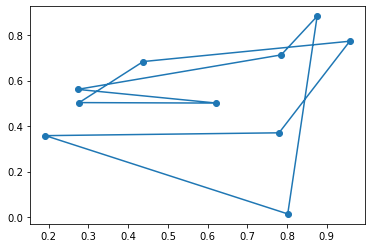

In [24]:
def show_tsp(tsp, tour = None):  
    """display the traveling salesman problem and a tour."""
    
    pos = tsp["pos"]
    
    plt.scatter(pos["x"], pos["y"])
    
    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()
        
        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")
        
        pos_ = pos.reindex(tour)
        pos_ = pos_.append(pos_.head(1))
        plt.plot(pos_["x"], pos_["y"])
    
    plt.show()
    
show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [25]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
%R if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

d = tsp["dist"]

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [26]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt_rep_100’ for 10 cities
tour length: 2.763574 


Tour length: 2.76


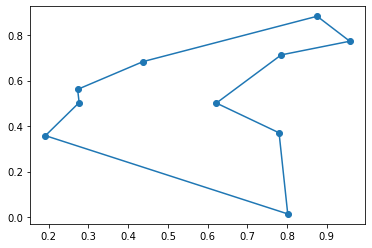

In [27]:
show_tsp(tsp, tour)

How long does it take to solve the problem 100 times?

In [28]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr    min      lq     mean median       uq     max neval
 tsp <- TSP(d) 287.99 302.479 324.9209 312.62 336.2445 616.048   100


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

In [ ]:
# Code goes here
import random

def calculate_objective(state):
    """Objective function: đếm số cặp quân hậu tấn công nhau."""
    n = len(state)
    conflicts = 0
    for i in range(n):
        for j in range(i+1, n):
            if state[i] == state[j] or abs(state[i]-state[j]) == abs(i-j):
                conflicts += 1
    return conflicts

def generate_random_state(n):
    """Sinh state ngẫu nhiên: mỗi cột có 1 queen ở một hàng."""
    return [random.randint(0, n-1) for _ in range(n)]

def steepest_ascent_hill_climbing_verbose(n, max_steps=100):
    current = generate_random_state(n)
    current_val = calculate_objective(current)
    
    print(f"Initial state: {current}, Objective = {current_val}")
    
    for step in range(max_steps):
        neighbors = []
        scores = []
        
        for col in range(n):
            for row in range(n):
                if row != current[col]:
                    neighbor = current.copy()
                    neighbor[col] = row
                    val = calculate_objective(neighbor)
                    neighbors.append(neighbor)
                    scores.append((neighbor, val))
        
        # Show tất cả local moves và giá trị objective
        print(f"\nStep {step+1}:")
        for move, val in scores:
            print(f"  Neighbor: {move}, Objective = {val}")
        
        # Chọn neighbor tốt nhất
        best_neighbor, best_val = min(scores, key=lambda x: x[1])
        print(f"--> Best move: {best_neighbor}, Objective = {best_val}")
        
        if best_val < current_val:
            current, current_val = best_neighbor, best_val
        else:
            print("No better neighbor found → local optimum reached.")
            break
    
    print(f"\nFinal solution: {current}, Objective = {current_val}")
    return current, current_val

# Ví dụ chạy với 8-Queens
solution, conflicts = steepest_ascent_hill_climbing_verbose(8, max_steps=3)

Initial state: [2, 0, 0, 3, 5, 1, 4, 2], Objective = 6

Step 1:
  Neighbor: [0, 0, 0, 3, 5, 1, 4, 2], Objective = 7
  Neighbor: [1, 0, 0, 3, 5, 1, 4, 2], Objective = 7
  Neighbor: [3, 0, 0, 3, 5, 1, 4, 2], Objective = 5
  Neighbor: [4, 0, 0, 3, 5, 1, 4, 2], Objective = 5
  Neighbor: [5, 0, 0, 3, 5, 1, 4, 2], Objective = 5
  Neighbor: [6, 0, 0, 3, 5, 1, 4, 2], Objective = 6
  Neighbor: [7, 0, 0, 3, 5, 1, 4, 2], Objective = 4
  Neighbor: [2, 1, 0, 3, 5, 1, 4, 2], Objective = 9
  Neighbor: [2, 2, 0, 3, 5, 1, 4, 2], Objective = 8
  Neighbor: [2, 3, 0, 3, 5, 1, 4, 2], Objective = 7
  Neighbor: [2, 4, 0, 3, 5, 1, 4, 2], Objective = 6
  Neighbor: [2, 5, 0, 3, 5, 1, 4, 2], Objective = 8
  Neighbor: [2, 6, 0, 3, 5, 1, 4, 2], Objective = 5
  Neighbor: [2, 7, 0, 3, 5, 1, 4, 2], Objective = 5
  Neighbor: [2, 0, 1, 3, 5, 1, 4, 2], Objective = 5
  Neighbor: [2, 0, 2, 3, 5, 1, 4, 2], Objective = 6
  Neighbor: [2, 0, 3, 3, 5, 1, 4, 2], Objective = 5
  Neighbor: [2, 0, 4, 3, 5, 1, 4, 2], Objective = 7


## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

In [ ]:
# Code goes here
def steepest_ascent_random_restarts(n, restarts=50, max_iters=1000):
    """Hill Climbing với nhiều random restarts."""
    best_state = None
    best_att = float('inf')

    for _ in range(restarts):
        init = [random.randint(0, n-1) for _ in range(n)]
        state, att = steepest_ascent(init, max_iters=max_iters)
        if att < best_att:
            best_att = att
            best_state = state
        if best_att == 0:
            break
    return best_state, best_att


Restart 1: State=[4, 1, 7, 0, 2, 5, 2, 6], Objective=2
Restart 2: State=[0, 6, 4, 2, 5, 3, 7, 3], Objective=2
Restart 3: State=[5, 1, 4, 6, 0, 3, 7, 2], Objective=1
Restart 4: State=[3, 0, 2, 5, 5, 1, 4, 7], Objective=2
Restart 5: State=[0, 4, 4, 1, 3, 6, 2, 7], Objective=2
Restart 6: State=[1, 5, 0, 2, 7, 2, 6, 3], Objective=1
Restart 7: State=[3, 6, 2, 7, 5, 0, 4, 1], Objective=1
Restart 8: State=[1, 5, 5, 0, 0, 3, 6, 2], Objective=2
Restart 9: State=[7, 5, 1, 2, 0, 6, 3, 7], Objective=2
Restart 10: State=[0, 2, 6, 3, 7, 4, 1, 5], Objective=1

Best solution found: [5, 1, 4, 6, 0, 3, 7, 2], Objective=1


## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

In [16]:
import random

N = 8  # số quân hậu

# --- Tính số xung đột ---
def compute_attacks(state):
    attacks = 0
    for i in range(N):
        for j in range(i+1, N):
            if state[i] == state[j] or abs(state[i]-state[j]) == abs(i-j):
                attacks += 1
    return attacks

# --- Sinh hàng xóm ---
def get_neighbors(state):
    neighbors = []
    for col in range(N):
        for row in range(N):
            if state[col] != row:  # di chuyển quân hậu trong cùng cột
                new_state = state.copy()
                new_state[col] = row
                neighbors.append(new_state)
    return neighbors

# --- Stochastic Hill Climbing ---
def stochastic_hill_climbing(max_steps=1000):
    current = [random.randint(0, N-1) for _ in range(N)]
    current_attacks = compute_attacks(current)

    for _ in range(max_steps):
        neighbors = get_neighbors(current)
        # lọc những neighbors tốt hơn
        better_neighbors = [s for s in neighbors if compute_attacks(s) < current_attacks]

        if not better_neighbors:  # không có move tốt hơn
            break
        # chọn ngẫu nhiên 1 move tốt hơn
        current = random.choice(better_neighbors)
        current_attacks = compute_attacks(current)

        if current_attacks == 0:
            break
    return current, current_attacks

# --- Multi-Restart ---
def multi_restart_stochastic(restarts=10):
    best_state, best_attacks = None, float("inf")

    for r in range(1, restarts+1):
        state, attacks = stochastic_hill_climbing()
        print(f"[Restart {r}] Attacks = {attacks}, State = {state}")
        if attacks < best_attacks:
            best_state, best_attacks = state, attacks

    print("\n=== Kết quả cuối cùng ===")
    print(f"Best State: {best_state}")
    print(f"Attacks: {best_attacks}")
    return best_state, best_attacks

# --- Chạy ---
multi_restart_stochastic(restarts=6)


[Restart 1] Attacks = 1, State = [5, 1, 4, 0, 3, 6, 4, 2]
[Restart 2] Attacks = 1, State = [5, 3, 6, 0, 3, 1, 4, 7]
[Restart 3] Attacks = 1, State = [2, 5, 2, 6, 1, 3, 7, 0]
[Restart 4] Attacks = 1, State = [5, 1, 6, 3, 0, 7, 4, 2]
[Restart 5] Attacks = 2, State = [5, 3, 6, 0, 2, 1, 7, 4]
[Restart 6] Attacks = 1, State = [6, 5, 7, 2, 0, 3, 1, 4]

=== Kết quả cuối cùng ===
Best State: [5, 1, 4, 0, 3, 6, 4, 2]
Attacks: 1


([5, 1, 4, 0, 3, 6, 4, 2], 1)

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

In [22]:
# Code goes here
def first_choice_hill_climbing(state, max_iters=1000):
    """Sinh 1 neighbor ngẫu nhiên, chấp nhận nếu tốt hơn."""
    current = state[:]
    current_att = attacks(current)
    n = len(state)

    for _ in range(max_iters):
        col = random.randint(0, n-1)
        row = random.randint(0, n-1)
        while row == current[col]:
            row = random.randint(0, n-1)
        neighbor = current[:]
        neighbor[col] = row
        att = attacks(neighbor)
        if att < current_att:
            current, current_att = neighbor, att
            if current_att == 0:
                break
    return current, current_att

def show_first_choice_hill_climbing(n=8, restarts=10, max_iters=1000):
    best_state = None
    best_att = float('inf')

    for r in range(1, restarts+1):
        init = [random.randint(0, n-1) for _ in range(n)]
        state, att = first_choice_hill_climbing(init, max_iters=max_iters)
        print(f"[Restart {r}] Attacks = {att}, State = {state}")
        if att < best_att:
            best_att, best_state = att, state
        if best_att == 0:
            break
    
    print("\n=== Kết quả cuối cùng ===")
    print(f"Best State: {best_state}")
    print(f"Attacks: {best_att}")
    return best_state, best_att

show_first_choice_hill_climbing(n=8, restarts=10)


[Restart 1] Attacks = 4, State = [2, 1, 6, 0, 5, 3, 7, 4]
[Restart 2] Attacks = 1, State = [3, 6, 2, 5, 1, 4, 0, 3]
[Restart 3] Attacks = 1, State = [2, 4, 7, 7, 3, 6, 0, 5]
[Restart 4] Attacks = 2, State = [1, 7, 0, 5, 3, 0, 6, 4]
[Restart 5] Attacks = 0, State = [3, 1, 7, 5, 0, 2, 4, 6]

=== Kết quả cuối cùng ===
Best State: [3, 1, 7, 5, 0, 2, 4, 6]
Attacks: 0


([3, 1, 7, 5, 0, 2, 4, 6], 0)

## Simulated Annealing [2 Points]

In [26]:
# Code goes here
import math

def simulated_annealing(state, max_iters=10000, start_temp=100, cooling=0.99):
    """Simulated Annealing cho N-Queens."""
    current = state[:]
    current_att = attacks(current)
    n = len(state)
    T = start_temp

    for _ in range(max_iters):
        if current_att == 0:
            break
        col = random.randint(0, n-1)
        row = random.randint(0, n-1)
        while row == current[col]:
            row = random.randint(0, n-1)
        neighbor = current[:]
        neighbor[col] = row
        att = attacks(neighbor)
        delta = current_att - att
        if delta > 0 or random.random() < math.exp(delta/T):
            current, current_att = neighbor, att
        T *= cooling
        if T < 1e-6:
            break
    return current, current_att

def show_simulated_annealing(n=8, restarts=5, max_iters=10000, start_temp=100, cooling=0.99):
    best_state = None
    best_att = float('inf')

    for r in range(1, restarts+1):
        init = [random.randint(0, n-1) for _ in range(n)]
        state, att = simulated_annealing(init, max_iters=max_iters, start_temp=start_temp, cooling=cooling)
        print(f"[Restart {r}] Attacks = {att}, State = {state}")
        if att < best_att:
            best_state, best_att = state, att
        if best_att == 0:
            break

    print("\n=== Kết quả cuối cùng ===")
    print(f"Best State: {best_state}")
    print(f"Attacks: {best_att}")
    return best_state, best_att
show_simulated_annealing(n=8, restarts=5)


[Restart 1] Attacks = 0, State = [4, 6, 1, 5, 2, 0, 7, 3]

=== Kết quả cuối cùng ===
Best State: [4, 6, 1, 5, 2, 0, 7, 3]
Attacks: 0


([4, 6, 1, 5, 2, 0, 7, 3], 0)

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [34]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.17380714416503906 milliseconds


In [8]:
# Code and results go here
import time
import random

def calculate_objective(state):
    n = len(state)
    conflicts = 0
    for i in range(n):
        for j in range(i+1, n):
            if state[i] == state[j] or abs(state[i]-state[j]) == abs(i-j):
                conflicts += 1
    return conflicts

def generate_random_state(n):
    return [random.randint(0, n-1) for _ in range(n)]

def steepest_ascent_hill_climbing(n, max_steps=1000):
    current = generate_random_state(n)
    current_val = calculate_objective(current)
    
    for step in range(max_steps):
        neighbors = []
        for col in range(n):
            for row in range(n):
                if row != current[col]:
                    neighbor = current.copy()
                    neighbor[col] = row
                    neighbors.append(neighbor)
        
        best_neighbor = min(neighbors, key=calculate_objective)
        best_val = calculate_objective(best_neighbor)
        
        if best_val < current_val:
            current, current_val = best_neighbor, best_val
        else:
            break
    return current, current_val

def compare_algorithms(sizes, algorithms, max_steps=2000):
    results = []
    for n in sizes:
        for name, algo in algorithms.items():
            t0 = time.time()
            solution, conflicts = algo(n, max_steps=max_steps)
            t1 = time.time()
            elapsed = (t1 - t0) * 1e3  # milliseconds
            results.append((name, n, conflicts, elapsed))
            print(f"{name} - N={n}: Conflicts={conflicts}, Time={elapsed:.2f} ms")
    return results

# Các thuật toán bạn đã code trước đó
algorithms = {
    "HillClimbing": steepest_ascent_hill_climbing,
    # "SimAnnealing": simulated_annealing,   # nếu đã có
    # "Genetic": genetic_algorithm,         # nếu đã có
}

sizes = [8, 16, 32, 50]
performance_results = compare_algorithms(sizes, algorithms)


HillClimbing - N=8: Conflicts=2, Time=1.00 ms
HillClimbing - N=16: Conflicts=2, Time=20.08 ms
HillClimbing - N=32: Conflicts=3, Time=827.19 ms
HillClimbing - N=50: Conflicts=3, Time=7450.64 ms


## Bonus: Genetic Algorithm [+1 Point]

In [28]:
# Code goes here
# 1.Khởi tạo quần thể (population) ngẫu nhiên.
# 2.Đánh giá fitness (ở đây fitness = số conflict càng ít càng tốt).
# 3.Chọn lọc (lấy cá thể tốt làm bố mẹ).
# 4.Lai ghép (crossover) sinh cá thể con.
# 5.Đột biến (mutation) ngẫu nhiên một số gene.
# 6.Lặp lại qua nhiều thế hệ.
# 7.Trả về cá thể tốt nhất (attacks = 0 nếu tìm được).

def genetic_algorithm(n, pop_size=100, generations=500, mutation_rate=0.1):
    """GA giải N-Queens."""
    # Khởi tạo population ngẫu nhiên
    population = [[random.randint(0, n-1) for _ in range(n)] for _ in range(pop_size)]

    def fitness(state):
        return -attacks(state)  # fitness cao hơn = ít attacks hơn

    for gen in range(generations):
        # Chọn lọc theo fitness
        scored = sorted(population, key=fitness, reverse=True)
        if attacks(scored[0]) == 0:
            return scored[0], 0
        # Chọn bố mẹ
        parents = scored[:pop_size//2]
        children = []
        while len(children) < pop_size:
            p1, p2 = random.sample(parents, 2)
            # Crossover 1 điểm
            point = random.randint(1, n-1)
            child = p1[:point] + p2[point:]
            # Mutation
            if random.random() < mutation_rate:
                col = random.randint(0, n-1)
                child[col] = random.randint(0, n-1)
            children.append(child)
        population = children
    best = min(population, key=attacks)
    return best, attacks(best)

def show_genetic_algorithm(n=8, runs=3, pop_size=100, generations=500, mutation_rate=0.1):
    best_state = None
    best_att = float('inf')

    for r in range(1, runs+1):
        state, att = genetic_algorithm(n, pop_size, generations, mutation_rate)
        print(f"[Run {r}] Attacks = {att}, State = {state}")
        if att < best_att:
            best_state, best_att = state, att
        if best_att == 0:
            break

    print("\n=== Kết quả cuối cùng ===")
    print(f"Best State: {best_state}")
    print(f"Attacks: {best_att}")
    return best_state, best_att

show_genetic_algorithm(n=8, runs=5)


[Run 1] Attacks = 0, State = [5, 3, 0, 4, 7, 1, 6, 2]

=== Kết quả cuối cùng ===
Best State: [5, 3, 0, 4, 7, 1, 6, 2]
Attacks: 0


([5, 3, 0, 4, 7, 1, 6, 2], 0)